# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter # element 개수 셀 때 사용

In [3]:
# wordcloud
!pip install konlpy
import json
from konlpy.tag import Okt # 단어 분석
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.1 MB/s eta 0:00:00


In [5]:
# clustering
! pip install soyclustering
from konlpy.tag import Komoran # 단어 분석
from sklearn.feature_extraction.text import CountVectorizer # 벡터화
from sklearn.feature_extraction.text import TfidfTransformer # tfidf
from soyclustering import SphericalKMeans # clustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Wordcloud

## 데이터 읽어오기
블로그 신한생명 검색 결과로 저장한 json 파일을 읽어오시오

In [8]:
from google.colab import files
file = files.upload()

Saving NanumGothic.ttf to NanumGothic.ttf
Saving naver_blog.json to naver_blog.json


In [9]:
df_json = pd.read_json("./naver_blog.json")
df_json.head()

,title,link,description,bloggername,bloggerlink,postdate
0,뷰티풀 민트 라이프 2023 뮤직 페스티벌 뷰민라 <b>포스코</b> 팝업...,https://blog.naver.com/pih870318/223103807388,2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 ...,초코혜 365일 매일이 여행 ♪,blog.naver.com/pih870318,20230516
1,♣ 5월 <b>포스코</b> 그룹주 주가 흐름,https://blog.naver.com/photoman75/223101456174,"© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급...",숨 그리고 삶,blog.naver.com/photoman75,20230514
2,문현 <b>포스코</b> 센트럴포레 부적격세대 알아보세요,https://blog.naver.com/guen1600/223071175085,문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b...,돈 걱정 없는 인생 만들기,blog.naver.com/guen1600,20230411
3,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트,https://blog.naver.com/sanbok91/223086651151,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트 정부의 부동산 규제 완화책 ...,부동산스토리,blog.naver.com/sanbok91,20230427
4,문현 <b>포스코</b> 센트럴포레 부적격세대 현장소식,https://blog.naver.com/wpthdud0/223085508053,문현 센트럴포레 - 시공사 <b>포스코</b> 건설 2022년 4월 사업승인 신청을...,하하하이모의 부동산정보,blog.naver.com/wpthdud0,20230426


##### description 내용만 list로 반환

In [10]:
descriptions = df_json["description"].to_list()
descriptions

['2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 캐릭터 인증샷 이벤트까지... 이번 뷰티풀 민트 라이프 2023에는 게보린, <b>포스코</b>, 뮤직카우 등의 부스를 만날 수 있었는데요. 사실 <b>포스코</b>에서... ',
 '© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급이 몰리면서 급등한 후 4월 20일 이후 조정을 받으며 하락하고 있다. <b>포스코</b>인터내셔널은 <b>포스코</b>그룹주중에서 가장 늦게 발동이 걸리며 4월 13일 종가 22,250원... ',
 '문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b>포스코</b> 아파트는 부산광역시 남구 문현동 334번지 일원에 위치하는 지역주택조합 아파트입니다. <b>포스코</b> 건설이 시공할 예정이며... ',
 '문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트 정부의 부동산 규제 완화책 이후에 여러 지표가 개선되며... 이런 측면에서 양호한 입지에 들어서는 지역주택조합 아파트 문현 <b>포스코</b> 센트럴포레 소개합니다.... ',
 '문현 센트럴포레 - 시공사 <b>포스코</b> 건설 2022년 4월 사업승인 신청을 하였고 2023년 6월 사업승인을 앞두고... 오늘은 그중에서도 남다른 생활환경으로 화제가 된 문현 <b>포스코</b> 센트럴포레에 대해 알아보겠습니다.... ',
 '문현 <b>포스코</b> 센트럴포레 문현동 아파트 조합원 선착순 (문현마루지역주택조합) 부산광역시 남구 문현동 334번지 일원이 사업부지인 문현 <b>포스코</b> 센트럴포레 사업승인 접수소식과 더불어 조합원 자격이... ',
 '문현 <b>포스코</b> 센트럴포레 문현동 아파트 분양 정보 부적격세대 이번 시즌 가장 핫한 곳이라 할 수 있는 문현 <b>포스코</b> 센트럴포레 아파트 공급 소식입니다. 문현마루지역주택조합으로 부적격 세대가 있어, 마지막... ',
 'https://home-plann

## KoNLPy를 이용한 단어 분석
KoNLPy: 파이썬 한국어 NLP
- 형태소 분석
 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발
 - Kkma: 꼬꼬마. 서울대학교 IDS 연구실 개발
 - Komoran: 코모란. Shineware에서 개발
 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기

*참고: https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

##### Question: Okt를 활용하여 첫 번째 문장의 형태소를 분석해보자

In [11]:
parser_kor = Okt()
parser_kor.pos(descriptions[0])

[('2023', 'Number'),
 ('뮤직', 'Noun'),
 ('페스티벌', 'Noun'),
 ('뷰민', 'Noun'),
 ('라', 'Josa'),
 ('뷰티풀', 'Noun'),
 ('민트', 'Noun'),
 ('라이프', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('팝업', 'Noun'),
 ('포석', 'Noun'),
 ('호', 'Noun'),
 ('캐릭터', 'Noun'),
 ('인증샷', 'Noun'),
 ('이벤트', 'Noun'),
 ('까지', 'Josa'),
 ('...', 'Punctuation'),
 ('이번', 'Noun'),
 ('뷰티풀', 'Noun'),
 ('민트', 'Noun'),
 ('라이프', 'Noun'),
 ('2023', 'Number'),
 ('에는', 'Josa'),
 ('게보린', 'Noun'),
 (',', 'Punctuation'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>,', 'Punctuation'),
 ('뮤직', 'Noun'),
 ('카우', 'Verb'),
 ('등', 'Noun'),
 ('의', 'Josa'),
 ('부스', 'Noun'),
 ('를', 'Josa'),
 ('만날', 'Noun'),
 ('수', 'Noun'),
 ('있었는데요', 'Adjective'),
 ('.', 'Punctuation'),
 ('사실', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'N

##### Question: descriptions의 모든 문장의 형태소를 분석해보자

In [12]:
parser_kor = Okt()
morphs = []         # 단어를 담을 리스트
for sentence in descriptions:                     # 리스트에서 각 문장 추출
    morphs.append(parser_kor.pos(sentence))  # 문장별 형태소 분석 결과 추가

In [13]:
morphs

[[('2023', 'Number'),
  ('뮤직', 'Noun'),
  ('페스티벌', 'Noun'),
  ('뷰민', 'Noun'),
  ('라', 'Josa'),
  ('뷰티풀', 'Noun'),
  ('민트', 'Noun'),
  ('라이프', 'Noun'),
  ('<', 'Punctuation'),
  ('b', 'Alpha'),
  ('>', 'Punctuation'),
  ('포스코', 'Noun'),
  ('</', 'Punctuation'),
  ('b', 'Alpha'),
  ('>', 'Punctuation'),
  ('팝업', 'Noun'),
  ('포석', 'Noun'),
  ('호', 'Noun'),
  ('캐릭터', 'Noun'),
  ('인증샷', 'Noun'),
  ('이벤트', 'Noun'),
  ('까지', 'Josa'),
  ('...', 'Punctuation'),
  ('이번', 'Noun'),
  ('뷰티풀', 'Noun'),
  ('민트', 'Noun'),
  ('라이프', 'Noun'),
  ('2023', 'Number'),
  ('에는', 'Josa'),
  ('게보린', 'Noun'),
  (',', 'Punctuation'),
  ('<', 'Punctuation'),
  ('b', 'Alpha'),
  ('>', 'Punctuation'),
  ('포스코', 'Noun'),
  ('</', 'Punctuation'),
  ('b', 'Alpha'),
  ('>,', 'Punctuation'),
  ('뮤직', 'Noun'),
  ('카우', 'Verb'),
  ('등', 'Noun'),
  ('의', 'Josa'),
  ('부스', 'Noun'),
  ('를', 'Josa'),
  ('만날', 'Noun'),
  ('수', 'Noun'),
  ('있었는데요', 'Adjective'),
  ('.', 'Punctuation'),
  ('사실', 'Noun'),
  ('<', 'Punctuation'),
 

##### Question: descriptions의 모든 문장에서 명사만 추출해보자

In [14]:
noun_list=[]  # 명사만 모은 리스트
for wt in morphs:
    noun_list += [word for word, tag in wt if tag == 'Noun' ]

In [15]:
noun_list

['뮤직',
 '페스티벌',
 '뷰민',
 '뷰티풀',
 '민트',
 '라이프',
 '포스코',
 '팝업',
 '포석',
 '호',
 '캐릭터',
 '인증샷',
 '이벤트',
 '이번',
 '뷰티풀',
 '민트',
 '라이프',
 '게보린',
 '포스코',
 '뮤직',
 '등',
 '부스',
 '만날',
 '수',
 '사실',
 '포스코',
 '출처',
 '포스코',
 '그룹',
 '주가',
 '이후',
 '수급',
 '급등',
 '후',
 '이후',
 '조정',
 '하락',
 '포스코',
 '인터내셔널',
 '포스코',
 '그룹',
 '주중',
 '가장',
 '발동',
 '종가',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '부적',
 '격',
 '세대',
 '선착순',
 '공급',
 '안내',
 '현',
 '센트럴',
 '포레',
 '포스코',
 '아파트',
 '부산광역시',
 '남구',
 '문현동',
 '번지',
 '일원',
 '위치',
 '지역',
 '주택조합',
 '아파트',
 '포스코',
 '건설',
 '시공',
 '예정',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '문현동',
 '마루',
 '아파트',
 '정부',
 '부동산',
 '규제',
 '완화',
 '책',
 '이후',
 '여러',
 '지표',
 '개선',
 '측면',
 '양호',
 '입지',
 '지역',
 '주택조합',
 '아파트',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '소개',
 '현',
 '센트럴',
 '포레',
 '시공사',
 '포스코',
 '건설',
 '사업',
 '승인',
 '신청',
 '사업',
 '승인',
 '오늘',
 '중',
 '생활환경',
 '화제',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '대해',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '문현동',
 '아파트',
 '조합원',
 '선착순',
 '마루',
 '지역',
 '주택조합',
 '부산광역시',
 '남구',
 '문현동',
 '번지',
 '일원',


##### Question: 각 명사가 출현한 빈도를 체크해보자

In [16]:
Counter(noun_list)

Counter({'뮤직': 2,
         '페스티벌': 1,
         '뷰민': 1,
         '뷰티풀': 2,
         '민트': 2,
         '라이프': 2,
         '포스코': 223,
         '팝업': 4,
         '포석': 1,
         '호': 1,
         '캐릭터': 1,
         '인증샷': 1,
         '이벤트': 1,
         '이번': 4,
         '게보린': 1,
         '등': 9,
         '부스': 1,
         '만날': 1,
         '수': 7,
         '사실': 3,
         '출처': 2,
         '그룹': 23,
         '주가': 21,
         '이후': 5,
         '수급': 1,
         '급등': 4,
         '후': 3,
         '조정': 1,
         '하락': 3,
         '인터내셔널': 12,
         '주중': 1,
         '가장': 5,
         '발동': 1,
         '종가': 1,
         '현': 13,
         '센트럴': 13,
         '포레': 13,
         '부적': 3,
         '격': 3,
         '세대': 3,
         '선착순': 2,
         '공급': 4,
         '안내': 3,
         '아파트': 12,
         '부산광역시': 2,
         '남구': 3,
         '문현동': 5,
         '번지': 4,
         '일원': 3,
         '위치': 8,
         '지역': 8,
         '주택조합': 5,
         '건설': 10,
         '시공': 2,
   

##### Question: 가장 빈번한 명사부터 나열해보자

In [17]:
Counter(noun_list).most_common()

[('포스코', 223),
 ('그룹', 23),
 ('사업', 23),
 ('홀딩스', 23),
 ('주가', 21),
 ('오늘', 17),
 ('주', 15),
 ('기업', 15),
 ('현', 13),
 ('센트럴', 13),
 ('포레', 13),
 ('인터내셔널', 12),
 ('아파트', 12),
 ('엠', 12),
 ('관련', 12),
 ('중', 11),
 ('케미칼', 11),
 ('건설', 10),
 ('더', 10),
 ('것', 10),
 ('엠텍', 10),
 ('등', 9),
 ('이', 9),
 ('회사', 9),
 ('주식', 9),
 ('스틸', 9),
 ('종목', 9),
 ('포항', 9),
 ('위치', 8),
 ('지역', 8),
 ('수', 7),
 ('리온', 7),
 ('상승', 7),
 ('에코', 7),
 ('및', 7),
 ('지원', 7),
 ('사거리', 7),
 ('센터', 7),
 ('점', 7),
 ('삼성', 7),
 ('금', 7),
 ('교육', 7),
 ('대해', 6),
 ('분양', 6),
 ('곳', 6),
 ('의', 6),
 ('실적', 6),
 ('퓨처엠', 6),
 ('부문', 6),
 ('철강', 6),
 ('업체', 6),
 ('한화', 6),
 ('투자', 6),
 ('이후', 5),
 ('가장', 5),
 ('문현동', 5),
 ('주택조합', 5),
 ('연동', 5),
 ('리튬', 5),
 ('기록', 5),
 ('상한', 5),
 ('소재', 5),
 ('위', 5),
 ('그', 5),
 ('분석', 5),
 ('개인', 5),
 ('매수', 5),
 ('위해', 5),
 ('퓨처', 5),
 ('전자', 5),
 ('한번', 5),
 ('시작', 5),
 ('공장', 5),
 ('서울', 5),
 ('타워', 5),
 ('행사', 5),
 ('제작', 5),
 ('인천', 5),
 ('팝업', 4),
 ('이번', 4),
 ('급등', 4),
 ('공급', 4

##### Question: 5번이 넘게 나온 단어들 목록을 탐색하고, 불필요한 명사 리스트를 만들어보자

In [18]:
worddict = Counter(noun_list)
[k for k, v in worddict.items() if int(v)>5]

['포스코',
 '등',
 '수',
 '그룹',
 '주가',
 '인터내셔널',
 '현',
 '센트럴',
 '포레',
 '아파트',
 '위치',
 '지역',
 '건설',
 '사업',
 '오늘',
 '중',
 '대해',
 '분양',
 '곳',
 '더',
 '것',
 '엠텍',
 '주',
 '이',
 '회사',
 '기업',
 '의',
 '엠',
 '실적',
 '주식',
 '퓨처엠',
 '스틸',
 '리온',
 '홀딩스',
 '케미칼',
 '부문',
 '상승',
 '에코',
 '철강',
 '및',
 '종목',
 '관련',
 '업체',
 '지원',
 '사거리',
 '센터',
 '점',
 '한화',
 '삼성',
 '금',
 '투자',
 '포항',
 '교육']

In [19]:
# 불필요한 명사 리스트
removelist = ['것', '중', '수', '이', '등', '대해', '비', '더', '가기', '의',
              '또', '명', '후', '좀', '별', '율', '나', '분', '무', '및', '뷰']

##### Question: 불필요한 명사 리스트를  worddict에서 제거해보자

In [20]:
for word in removelist:
    if word in worddict.keys():
        del worddict[word]

worddict.most_common()

[('포스코', 223),
 ('그룹', 23),
 ('사업', 23),
 ('홀딩스', 23),
 ('주가', 21),
 ('오늘', 17),
 ('주', 15),
 ('기업', 15),
 ('현', 13),
 ('센트럴', 13),
 ('포레', 13),
 ('인터내셔널', 12),
 ('아파트', 12),
 ('엠', 12),
 ('관련', 12),
 ('케미칼', 11),
 ('건설', 10),
 ('엠텍', 10),
 ('회사', 9),
 ('주식', 9),
 ('스틸', 9),
 ('종목', 9),
 ('포항', 9),
 ('위치', 8),
 ('지역', 8),
 ('리온', 7),
 ('상승', 7),
 ('에코', 7),
 ('지원', 7),
 ('사거리', 7),
 ('센터', 7),
 ('점', 7),
 ('삼성', 7),
 ('금', 7),
 ('교육', 7),
 ('분양', 6),
 ('곳', 6),
 ('실적', 6),
 ('퓨처엠', 6),
 ('부문', 6),
 ('철강', 6),
 ('업체', 6),
 ('한화', 6),
 ('투자', 6),
 ('이후', 5),
 ('가장', 5),
 ('문현동', 5),
 ('주택조합', 5),
 ('연동', 5),
 ('리튬', 5),
 ('기록', 5),
 ('상한', 5),
 ('소재', 5),
 ('위', 5),
 ('그', 5),
 ('분석', 5),
 ('개인', 5),
 ('매수', 5),
 ('위해', 5),
 ('퓨처', 5),
 ('전자', 5),
 ('한번', 5),
 ('시작', 5),
 ('공장', 5),
 ('서울', 5),
 ('타워', 5),
 ('행사', 5),
 ('제작', 5),
 ('인천', 5),
 ('팝업', 4),
 ('이번', 4),
 ('급등', 4),
 ('공급', 4),
 ('번지', 4),
 ('예정', 4),
 ('승인', 4),
 ('소식', 4),
 ('정보', 4),
 ('핫', 4),
 ('미래', 4),
 ('내', 4),
 ('인터네

## WordCloud 만들기

##### Question: wordcloud 인스턴스 선언

In [24]:
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# background_color='white'
# colormap = 'Accent_r'
# width = 800
# height = 800
wordcloud = WordCloud(
    font_path = './NanumGothic.ttf', #한글 사용 위해서 /usr/share/fonts/truetype/nanum
    background_color='white',       # 배경 색깔 정하기
    colormap = 'Accent_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
    width = 800,
    height = 800
)

##### Question: worddict을 이용하여 wordcloud 생성

In [25]:
wordcloud.generate_from_frequencies(worddict)

##### Question: wordcloud 출력

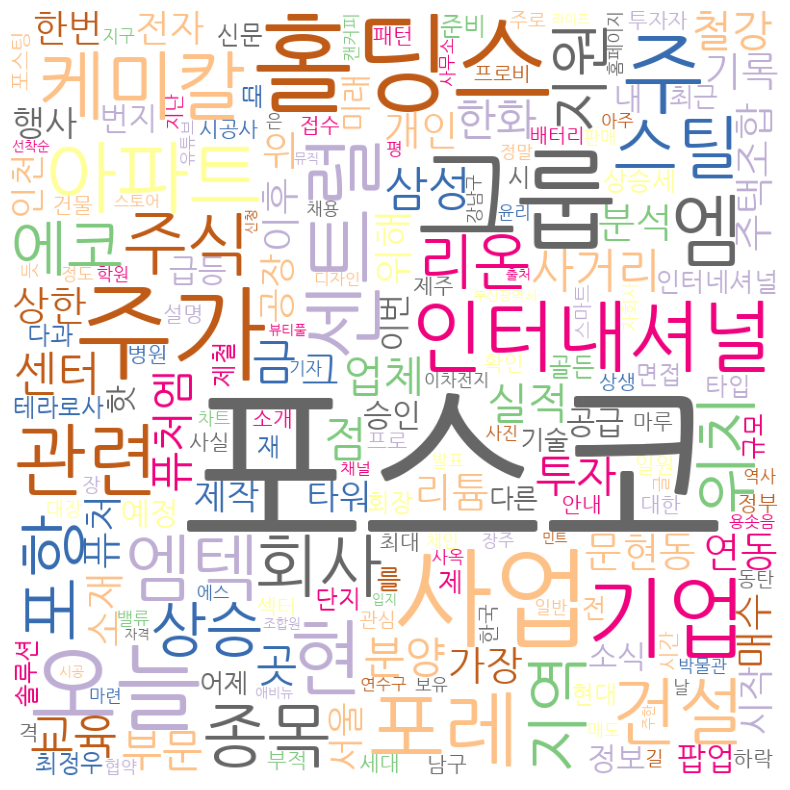

In [26]:
fig = plt.figure(figsize=(10, 10))  # 그림 크기 설정
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Clustering

## KoNLPy를 이용한 단어 분석
- 형태소 분석
 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발
 - Kkma: 꼬꼬마. 서울대학교 IDS 연구실 개발
 - Komoran: 코모란. Shineware에서 개발
 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기

##### Komoran를 활용하여 첫 번째 문장의 형태소를 분석 (Okt와 동일한 방식)

In [27]:
komoran = Komoran()
komoran.pos(descriptions[0])

[('2023', 'SN'),
 ('뮤직', 'NNP'),
 ('페스티벌', 'NNP'),
 ('뷰민라', 'NA'),
 ('뷰티풀 민트 라이프', 'NNP'),
 ('<', 'SS'),
 ('b', 'SL'),
 ('>', 'SS'),
 ('포스코', 'NNP'),
 ('<', 'SS'),
 ('/', 'SP'),
 ('b', 'SL'),
 ('>', 'SS'),
 ('팝', 'NNG'),
 ('업', 'NNG'),
 ('포', 'NNG'),
 ('석호', 'NNP'),
 ('캐릭터', 'NNP'),
 ('인증', 'NNP'),
 ('샷', 'NNG'),
 ('이벤트', 'NNP'),
 ('까지', 'JX'),
 ('...', 'SE'),
 ('이번', 'NNG'),
 ('뷰티풀 민트 라이프', 'NNP'),
 ('2023', 'SN'),
 ('에', 'JKB'),
 ('는', 'JX'),
 ('게', 'NNG'),
 ('보리', 'NNP'),
 ('ㄴ', 'JX'),
 (',', 'SP'),
 ('<', 'SS'),
 ('b', 'SL'),
 ('>', 'SS'),
 ('포스코', 'NNP'),
 ('<', 'SS'),
 ('/', 'SP'),
 ('b', 'SL'),
 ('>', 'SS'),
 (',', 'SP'),
 ('뮤직', 'NNP'),
 ('카', 'NNP'),
 ('우', 'NNP'),
 ('등', 'NNB'),
 ('의', 'JKG'),
 ('부스', 'NNG'),
 ('를', 'JKO'),
 ('만나', 'VV'),
 ('ㄹ', 'ETM'),
 ('수', 'NNB'),
 ('있', 'VX'),
 ('었', 'EP'),
 ('는데요', 'EF'),
 ('.', 'SF'),
 ('사실', 'NNG'),
 ('<', 'SS'),
 ('b', 'SL'),
 ('>', 'SS'),
 ('포스코', 'NNP'),
 ('<', 'SS'),
 ('/', 'SP'),
 ('b', 'SL'),
 ('>', 'SS'),
 ('에서', 'JKB'),
 ('...

=> okt와 동일한 메소드를 가지고 있지만 품사 표현 방식이 다름

##### komoran 인스턴스의 nouns 메소드 활용하여 명사 목록 추출

In [28]:
# nouns 메소드의
komoran = Komoran()
komoran.nouns(descriptions[0])

['뮤직',
 '페스티벌',
 '뷰티풀 민트 라이프',
 '포스코',
 '팝',
 '업',
 '포',
 '석호',
 '캐릭터',
 '인증',
 '샷',
 '이벤트',
 '이번',
 '뷰티풀 민트 라이프',
 '게',
 '보리',
 '포스코',
 '뮤직',
 '카',
 '우',
 '등',
 '부스',
 '수',
 '사실',
 '포스코']

okt 모듈도 nouns라는 동일한 메소드가 있어 명사를 추출하고자 할 때 바로 사용 가능

##### 모든 문장에서 명사 리스트 추출

In [29]:
nouns = []
for sentence in descriptions:
    nouns += komoran.nouns(sentence)

In [30]:
nouns

['뮤직',
 '페스티벌',
 '뷰티풀 민트 라이프',
 '포스코',
 '팝',
 '업',
 '포',
 '석호',
 '캐릭터',
 '인증',
 '샷',
 '이벤트',
 '이번',
 '뷰티풀 민트 라이프',
 '게',
 '보리',
 '포스코',
 '뮤직',
 '카',
 '우',
 '등',
 '부스',
 '수',
 '사실',
 '포스코',
 '출처',
 '포스코',
 '그룹',
 '주가',
 '3월',
 '이후',
 '수급',
 '급등',
 '후',
 '4월 20일',
 '이후',
 '조정',
 '하락',
 '포스코',
 '인터내셔널',
 '포스코',
 '그룹',
 '주중',
 '발동',
 '4월 13일',
 '종가',
 '원',
 '문',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '부적격',
 '세대',
 '선착순',
 '공급',
 '안내',
 '문',
 '현',
 '센트럴',
 '포레',
 '포스코',
 '아파트',
 '부산광역시',
 '남구',
 '문현동',
 '번지',
 '일원',
 '위치',
 '지역',
 '주택조합',
 '아파트',
 '포스코',
 '건설',
 '시공',
 '예정',
 '문',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '문현동',
 '마루',
 '아파트',
 '정부',
 '부동산',
 '규제',
 '완화책',
 '이후',
 '지표',
 '개선',
 '측면',
 '양호',
 '입지',
 '지역',
 '주택조합',
 '아파트',
 '문',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '소개',
 '문',
 '현',
 '센트럴',
 '포레',
 '시공사',
 '포스코',
 '건설',
 '년',
 '4월',
 '사업',
 '승인',
 '신청',
 '년',
 '6월',
 '사업',
 '승인',
 '오늘',
 '그중',
 '생활환경',
 '화제',
 '문',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '문',
 '현',
 '포스코',
 '센트럴',
 '포레',
 '문현동',
 '아파트',
 '조합원',


In [31]:
len(nouns)

2255

##### Question: 각 명사가 출현한 빈도를 체크해보자

In [32]:
noun_counter = Counter(nouns)
noun_counter

Counter({'뮤직': 2,
         '페스티벌': 1,
         '뷰티풀 민트 라이프': 2,
         '포스코': 188,
         '팝': 4,
         '업': 5,
         '포': 5,
         '석호': 1,
         '캐릭터': 1,
         '인증': 1,
         '샷': 1,
         '이벤트': 1,
         '이번': 4,
         '게': 2,
         '보리': 1,
         '카': 1,
         '우': 2,
         '등': 9,
         '부스': 1,
         '수': 8,
         '사실': 3,
         '출처': 2,
         '그룹': 22,
         '주가': 19,
         '3월': 1,
         '이후': 5,
         '수급': 1,
         '급등': 4,
         '후': 4,
         '4월 20일': 1,
         '조정': 1,
         '하락': 3,
         '인터내셔널': 12,
         '주중': 1,
         '발동': 1,
         '4월 13일': 1,
         '종가': 1,
         '원': 4,
         '문': 18,
         '현': 15,
         '센트럴': 13,
         '포레': 13,
         '부적격': 3,
         '세대': 3,
         '선착순': 2,
         '공급': 4,
         '안내': 3,
         '아파트': 12,
         '부산광역시': 2,
         '남구': 3,
         '문현동': 5,
         '번지': 4,
         '일원': 3,
         '위치': 8,

In [33]:
len(noun_counter)

1008

##### Question: 출현 빈도가 1번뿐인 단어 삭제 (빈도가 2 이상인 단어만 남기기)

In [34]:
noun_freq = [word for word, freq in noun_counter.items() if freq >= 2]

In [35]:
noun_freq

['뮤직',
 '뷰티풀 민트 라이프',
 '포스코',
 '팝',
 '업',
 '포',
 '이번',
 '게',
 '우',
 '등',
 '수',
 '사실',
 '출처',
 '그룹',
 '주가',
 '이후',
 '급등',
 '후',
 '하락',
 '인터내셔널',
 '원',
 '문',
 '현',
 '센트럴',
 '포레',
 '부적격',
 '세대',
 '선착순',
 '공급',
 '안내',
 '아파트',
 '부산광역시',
 '남구',
 '문현동',
 '번지',
 '일원',
 '위치',
 '지역',
 '주택조합',
 '건설',
 '시공',
 '예정',
 '마루',
 '정부',
 '부동산',
 '입지',
 '소개',
 '시공사',
 '년',
 '4월',
 '사업',
 '승인',
 '신청',
 '6월',
 '오늘',
 '그중',
 '조합원',
 '사업부',
 '접수',
 '소식',
 '자격',
 '분양',
 '정보',
 '핫',
 '곳',
 '연동',
 '애비뉴',
 '제주',
 '제주한라병원',
 '주변',
 '것',
 '확인',
 '리튬',
 '주',
 '회사',
 '기업',
 '중',
 '실적',
 '번',
 '미래',
 '안녕하세요',
 '요새',
 '시장',
 '주식',
 '쪽',
 '차',
 '전지',
 '코스닥',
 '주목',
 '신고',
 '기록',
 '스틸',
 '리오',
 '상한가',
 '당사',
 '사명',
 '케미',
 '칼',
 '부문',
 '문별',
 '내',
 '에너지',
 '소재',
 '아래',
 '지주',
 '상승',
 '터',
 '분석',
 '인',
 '투자자',
 '사람',
 '지주회사',
 '최근',
 '에코',
 '프로',
 '개인',
 '매수',
 '위',
 '섹터',
 '코스',
 '철강',
 '속',
 '시간',
 '국내',
 '이',
 '분',
 '설명',
 '월',
 '경우',
 '최',
 '개발',
 '건물',
 '강',
 '세부',
 '패턴',
 '복기',
 '종목',
 '화순',
 '올해',
 '쯤',
 '주거',
 '관련'

In [36]:
len(noun_freq)

392

### CounterVectorizer 작동 예제

CountVectorizer: 단어들의 카운트(출현 빈도)로 문서를 벡터화 (단어는 모두 소문자로 변환시켜서 셈)

In [37]:
# example data
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

#### 1-gram (각 단어를 feature로)

##### countvectorizer 생성 및 학습

In [38]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [39]:
type(X)

scipy.sparse._csr.csr_matrix

- scipy.sparse.csr.csr_matrix: compressed spares row matrix
- toarray(): csr_mtrix를 dense ndarry representation으로 반환해주는 메소드

##### compressed sparse matrix를 array 형태로 변환

In [40]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [43]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

##### 단어 출현 빈도 확인

In [44]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

#### n-gram (여러 단어를 묶어서 하나의 feature로)
e.g. ngram_range = (2, 2)

##### countvectorizer 생성 및 학습

In [45]:
vectorizer = CountVectorizer(ngram_range=(2, 2)) # (2, 2) only bi-gram
X = vectorizer.fit_transform(corpus)

##### feature names 확인 & compressed sparse matrix to array & 단어 출현 빈도 확인

In [46]:
print(vectorizer.get_feature_names())
print("")
print(X.toarray())
print("")
print(vectorizer.vocabulary_)

AttributeError: ignored

#### 글자별로 feature화
analyzer = "char"

##### countvectorizer 생성 및 학습 (글자 단위, 2개씩) & feature names 확인 & compressed sparse matrix to array & 단어 출현 빈도 확인

In [49]:
vectorizer = CountVectorizer(analyzer="char", ngram_range=(2, 2)) #공백도 포함해서 2자씩
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print("")
print(X.toarray())
print("")
print(vectorizer.vocabulary_)

[' d' ' f' ' i' ' o' ' s' ' t' 'an' 'co' 'cu' 'd ' 'do' 'e ' 'e.' 'ec'
 'en' 'fi' 'he' 'hi' 'ir' 'is' 'me' 'nd' 'ne' 'nt' 'oc' 'on' 'rd' 'rs'
 's ' 'se' 'st' 't ' 't.' 't?' 'th' 'um']

[[1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 2 1 0 0 1 1 0 0 1 2 0 1 1 1 0 2 1]
 [2 0 1 0 1 1 0 1 2 1 2 1 0 1 2 0 1 1 0 2 2 1 0 2 2 1 0 0 2 1 0 1 1 0 2 2]
 [0 0 1 1 0 3 1 0 0 2 0 1 1 0 0 0 1 2 1 2 0 1 1 0 0 1 1 0 2 0 0 0 0 0 3 0]
 [1 1 0 0 0 2 0 0 1 0 1 1 0 0 1 1 1 1 1 2 1 0 0 1 1 0 0 1 2 0 1 1 0 1 2 1]]

{'th': 34, 'hi': 17, 'is': 19, 's ': 28, ' i': 2, ' t': 5, 'he': 16, 'e ': 11, ' f': 1, 'fi': 15, 'ir': 18, 'rs': 27, 'st': 30, 't ': 31, ' d': 0, 'do': 10, 'oc': 24, 'cu': 8, 'um': 35, 'me': 20, 'en': 14, 'nt': 23, 't.': 32, ' s': 4, 'se': 29, 'ec': 13, 'co': 7, 'on': 25, 'nd': 21, 'd ': 9, 'an': 6, 'rd': 26, ' o': 3, 'ne': 22, 'e.': 12, 't?': 33}


### Countervectorizer using custom tokenizer

##### 커스텀 토크나이저 정의
noun_freq (2번 이상 사용된 명사들), komoran.nouns() 활용

In [50]:
nouns = []
for sentence in descriptions:
    nouns += komoran.nouns(sentence)
noun_counter = Counter(nouns)
noun_freq = [word for word, freq in noun_counter.items() if freq >= 2]

In [51]:
def custom_tokenizer(sentence):
    # 2번 이상 출현한 명사만 찾아주는 토크나이저
    return [word for word in komoran.nouns(sentence) if word in noun_freq]

In [52]:
print(custom_tokenizer(descriptions[0]))
print(custom_tokenizer(descriptions[1]))
print(custom_tokenizer(descriptions[2]))

['뮤직', '뷰티풀 민트 라이프', '포스코', '팝', '업', '포', '이번', '뷰티풀 민트 라이프', '게', '포스코', '뮤직', '우', '등', '수', '사실', '포스코']
['출처', '포스코', '그룹', '주가', '이후', '급등', '후', '이후', '하락', '포스코', '인터내셔널', '포스코', '그룹', '원']
['문', '현', '포스코', '센트럴', '포레', '부적격', '세대', '선착순', '공급', '안내', '문', '현', '센트럴', '포레', '포스코', '아파트', '부산광역시', '남구', '문현동', '번지', '일원', '위치', '지역', '주택조합', '아파트', '포스코', '건설', '시공', '예정']


##### CountVectorizer에 커스텀 토크나이저 적용하여 countervectorize 생성 및 학습

In [53]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(descriptions)
X

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<100x392 sparse matrix of type '<class 'numpy.int64'>'
	with 1199 stored elements in Compressed Sparse Row format>

##### feature names 확인 & compressed sparse matrix to array & 단어 출현 빈도 확인

In [54]:
vectorizer.get_feature_names()

AttributeError: ignored

In [55]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [56]:
vectorizer.vocabulary_

{'뮤직': 113,
 '뷰티풀 민트 라이프': 139,
 '포스코': 360,
 '팝': 354,
 '업': 216,
 '포': 358,
 '이번': 244,
 '게': 22,
 '우': 234,
 '등': 88,
 '수': 179,
 '사실': 147,
 '출처': 331,
 '그룹': 46,
 '주가': 289,
 '이후': 247,
 '급등': 51,
 '후': 390,
 '하락': 364,
 '인터내셔널': 253,
 '원': 235,
 '문': 110,
 '현': 375,
 '센트럴': 171,
 '포레': 359,
 '부적격': 133,
 '세대': 167,
 '선착순': 165,
 '공급': 33,
 '안내': 209,
 '아파트': 207,
 '부산광역시': 132,
 '남구': 64,
 '문현동': 112,
 '번지': 124,
 '일원': 257,
 '위치': 239,
 '지역': 305,
 '주택조합': 297,
 '건설': 20,
 '시공': 190,
 '예정': 228,
 '마루': 98,
 '정부': 277,
 '부동산': 130,
 '입지': 259,
 '소개': 172,
 '시공사': 191,
 '년': 68,
 '4월': 3,
 '사업': 148,
 '승인': 187,
 '신청': 200,
 '6월': 5,
 '오늘': 229,
 '그중': 47,
 '조합원': 286,
 '사업부': 149,
 '접수': 274,
 '소식': 174,
 '자격': 260,
 '분양': 138,
 '정보': 276,
 '핫': 373,
 '곳': 32,
 '연동': 224,
 '애비뉴': 211,
 '제주': 283,
 '제주한라병원': 284,
 '주변': 293,
 '것': 21,
 '확인': 385,
 '리튬': 96,
 '주': 288,
 '회사': 388,
 '기업': 56,
 '중': 299,
 '실적': 203,
 '번': 123,
 '미래': 115,
 '안녕하세요': 210,
 '요새': 233,
 '시장': 194,
 '주식':

## TF-IDF
어떤 단어의 빈도가 문서 내에서는 높은 편이 아니더라도, 해당 단어가 나타나는 문서가 적다면 문서를 대표하는 중요한 단어가 될 수 있음
![image.png](attachment:image.png)

##### tf-idf 학습

In [57]:
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X)

##### tf-idf 하기 전/후 비교

In [58]:
X.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
X_tfidf.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.23990512, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## clustering

##### Spherical k-means
- sparse vector의 clustering을 위해 활용
- cosine distance 활용
- 모든 데이터 포인트를 unit vector가 되도록 변형해서 이용
- centroid로 한 군집에 포함된 모든 벡터의 평균을 사용하지 않고, 벡터의 합을 L2 normalize 하여 centroid를 unit vector로 만듦
- 특별한 initialize 방법 사용

This package is implementation of Improving spherical k-means for document clustering: Fast initialization, sparse centroid projection, and efficient cluster labeling (Kim et al., 2020).

##### spherical k-means 인스턴스 생성 및 학습
cluster 수 = 4

In [60]:
kmeans = SphericalKMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_tfidf)
labels

array([1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 3, 1, 3, 3, 3, 1, 0, 0, 3, 0,
       1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 2, 2,
       3, 0, 3, 1, 1, 3, 2, 1, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 3, 1, 0, 3,
       3, 2, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 0, 3, 3, 3, 0, 2, 1, 2, 3,
       0, 3, 0, 3, 1, 1, 2, 3, 3, 3, 0, 3])

In [61]:
# descriptions, clustering 결과 dataframe 생성
df_descriptions = pd.DataFrame({"description": descriptions, "label": labels})
df_descriptions.head()

,description,label
0,2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 ...,1
1,"© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급...",2
2,문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b...,0
3,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트 정부의 부동산 규제 완화책 ...,0
4,문현 센트럴포레 - 시공사 <b>포스코</b> 건설 2022년 4월 사업승인 신청을...,0


##### 군집별 상위 10개의 최빈 단어 비교

In [62]:
for i in range(4):
    lists = df_descriptions.loc[df_descriptions["label"] == i, "description"].to_list()
    nouns = []
    for sentence in lists:
        nouns += custom_tokenizer(sentence)
    print(f"cluster{i}: {Counter(nouns).most_common(10)}")
    print("")

cluster0: [('포스코', 37), ('문', 18), ('현', 15), ('센트럴', 13), ('포레', 13), ('아파트', 11), ('지역', 8), ('건설', 8), ('위치', 7), ('문현동', 5)]

cluster1: [('포스코', 35), ('그룹', 11), ('주', 9), ('것', 7), ('등', 6), ('회사', 6), ('중', 6), ('투자', 6), ('차', 5), ('전', 5)]

cluster2: [('포스코', 19), ('종목', 10), ('스틸', 8), ('리오', 6), ('상한가', 5), ('그룹', 4), ('차트', 4), ('이후', 3), ('후', 3), ('투자', 3)]

cluster3: [('포스코', 97), ('주가', 18), ('기업', 13), ('차', 11), ('사업', 11), ('전지', 10), ('오늘', 10), ('케미', 9), ('칼', 9), ('년', 9)]



## 클러스터별 워드 클라우드

##### 워드클라우드 학습하는 함수 만들기

In [67]:
def get_wordcloud(texts):
    # 문장리스트를 받아와
    # 커스텀 토크나이저를 이용해 최소 2번 이상 출현한 명사들만 추출
    # Counter를 이용하여 명사별 빈도를 측정하고
    # wordcloud 학습
    wordcloud = WordCloud(
        font_path = './NanumGothic.ttf', #한글 사용 위해서
        background_color='white',       # 배경 색깔 정하기
        colormap = 'Accent_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
        width = 800, height = 800)

    nouns = [noun for text in texts for noun in custom_tokenizer(text)]
    noun_counter = Counter(nouns)
    wordcloud.generate_from_frequencies(noun_counter)
    return wordcloud

##### 전체 데이터로 워드클라우드 만들기

In [68]:
wc = get_wordcloud(descriptions)

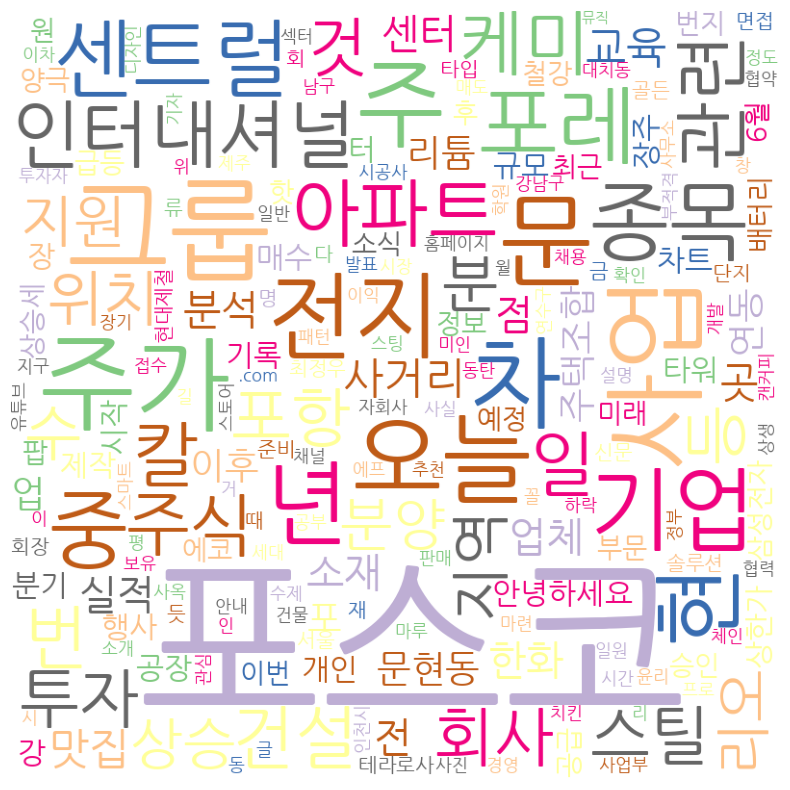

In [69]:
fig = plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

##### 클러스터별 워드클라우드 만들기

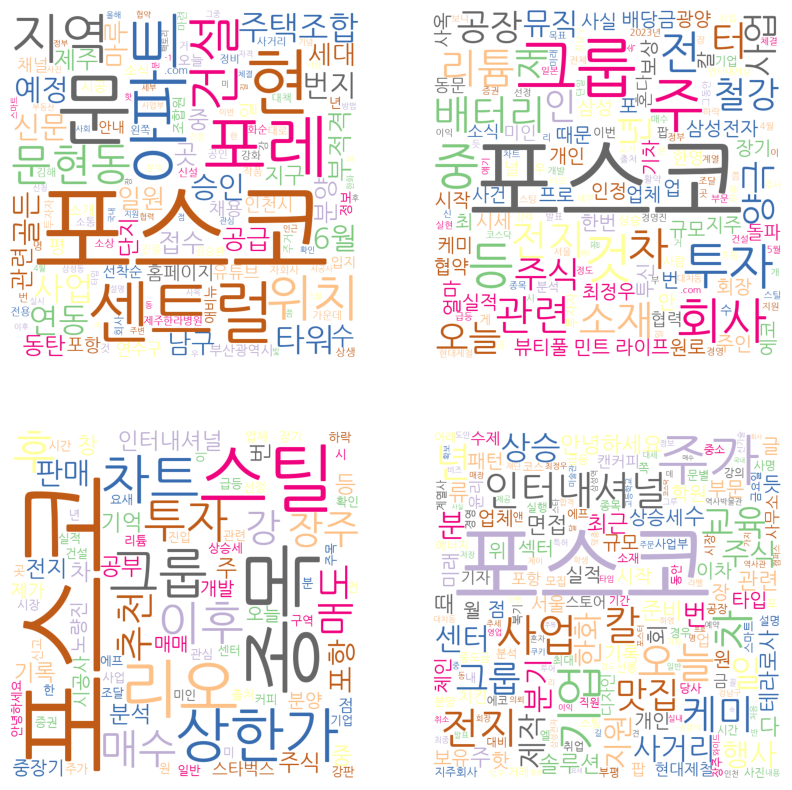

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    texts = df_descriptions.loc[df_descriptions['label']==i, "description"].to_list()
    wc = get_wordcloud(texts)
    axes[i//2, i%2].imshow(wc)
    axes[i//2, i%2].axis("off")
plt.show()